<a href="https://colab.research.google.com/github/KhotShraddha27/ANN1/blob/main/lms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

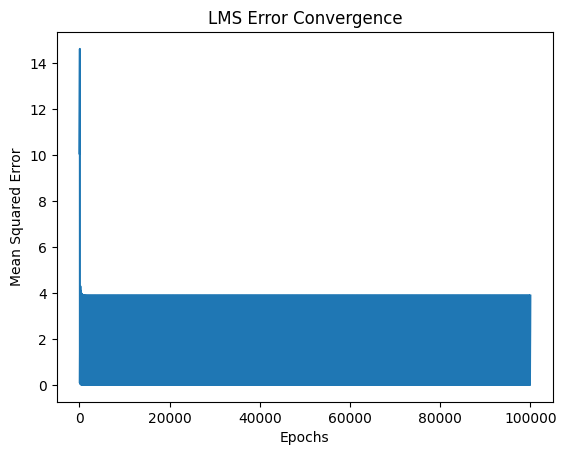

AttributeError: module 'matplotlib.pyplot' has no attribute 'scaterr'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(-10,10,100)
Y = 2 * X + 1 + np.random.randn(100) * 2

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

w = np.random.randn(1)
b = np.random.randn(1)
learning_rate =0.01
epochs =1000

errors = []

for epoch in range(epochs) :
  total_error = 0
  for i in range(len(X)):
    y_pred =np.dot(X[i],w)+b
    error=Y[i]-y_pred
    w += learning_rate * error *X[i]
    b += learning_rate * error

    total_error += error**2
    errors.append(total_error/len(X))

if epoch %100==0:
    print(f"Epoch {epoch+1}/{epochs},Total Error : {(total_error/len(X))[0]:.4f}")

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('LMS Error Convergence')
plt.show()

y_pred_final =np.dot(X,w)+b
plt.scaterr(X,Y,color='blue',label='Actual Data')
plt.plot(X,Y,color='blue',label='LMS Prediction',linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Learned Weight: {w[0]:.4f},Learned Bias: {b[0]:.4f}")




In [ ]:
  import numpy as np

  def sigmoid(x):
    return 1/(1+np.exp(-x))

  def sigmoid_derivate(x):
    return x * (1-x)

  def mse_loss(y_true,y_pred):
    return np.mean((y_true - y_pred)**2)

  def cross_entropy_loss(y_true,y_pred):
    epsilon =1e-12
    y_pred = np.clip(y_pred,epsilon,1-epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

np.random.seed(42)
weights = np.random.rand(2,1)
bias = np.random.rand(1)

epochs =1000
learning_rate =0.1

mse_losses = []
ce_losses =[]

for epoch in range(epochs):
    linear_output = np.dot(x,weights) + bias
    pred = sigmoid(linear_output)
    mse = mse_loss(y,pred)
    ce = cross_entropy_loss(y,pred)
    mse_losses.append(mse)
    ce_losses.append(ce)

    error =  y - pred
    d_pred = error * sigmoid_derivate(pred)
    weights += learning_rate * np.dot(x.T,d_pred)
    bias += learning_rate *np.sum(d_pred)

final_preds= np.round(sigmoid(np.dot(x,weights)+bias))
print("Final Predictions(rounded):\n",final_preds)
print("\n Final MSE Loss :",mse_losses[-1])
print("Final Cross Entropy Loss :",ce_losses[-1])


Final Predictions(rounded):
 [[0.]
 [0.]
 [0.]
 [1.]]

 Final MSE Loss : 0.2500007856683694
Final Cross Entropy Loss : 0.6931487506234757


In [ ]:
_